In [4]:
import pandas as pd
import os

In [5]:
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 'css_graph.gpickle',
 'PapersCCS.txt',
 'paper_subset',
 'README.md',
 'Week 4 - Networks I.ipynb',
 'Week 5 - full_css_network.png',
 'Week 5 - full_css_network_colored.png',
 'Week 5 - lcc_network.png',
 'Week 5 - Networks II.ipynb',
 'Week6.ipynb',
 'Week7.ipynb']

In [168]:
df_papers = pd.read_csv('PapersCCS.txt')

In [169]:
df_papers

,Unnamed: 0,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields
0,442,b30d4b44131698820ed05bcf7fb62c8fc6201672,Developing recommendations for designing smart...,2019,1.0,NaN,"['Computer Science', 'Sociology']",['1788563'],['Computer Science']
1,2964,9d59892c5657098bd3825116af8fad8d8ee943ff,Group Fairness for Indivisible Goods Allocation,2019,4.0,NaN,"['Economics', 'Computer Science']","['1749906', '4006636']","['Economics', 'Computer Science']"
2,27944,867cc74781225da4e08a77fc35037ba77911e455,Hindsight Credit Assignment,2019,37.0,NaN,"['Economics', 'Computer Science']","['37666967', '144368601', '2605877', '3134710']","['Computer Science', 'Computer Science', 'Comp..."
3,31824,37a0f28f6aa41028e64d0440001ff525d67c1305,The Constrained Round Robin Algorithm for Fair...,2019,9.0,NaN,"['Economics', 'Computer Science']","['144433798', '143999398']","['Economics', 'Computer Science']"
4,83205,894b376090e1e843c79211603814ccbcab09f632,Interpretable Almost Matching Exactly With Ins...,2019,5.0,NaN,"['Economics', 'Computer Science']","['31938009', '48395540', '6974508']","['Computer Science', 'Computer Science', 'Comp..."
...,...,...,...,...,...,...,...,...,...
1443,391796,3cbdec1b14b23320f175ac0f4936871d96fa9f07,The Keyword Explorer Suite: A Toolkit for Unde...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']",['40289577'],['Computer Science']
1444,1080886,12e93d2094d51acedb43727dacfe9da355f5d10f,Using citation networks to evaluate the impact...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']","['3161628', '143975462']","['Computer Science', 'Computer Science']"
1445,1795582,6348ea334196587c419b0cfc6b6bae11679b02eb,Cryptocurrency co-investment network: token re...,2023,0.0,NaN,['Economics'],['2818774'],['Computer Science']
1446,2471693,08a51de6f966f298baf711b80b00fc5701aa663c,#EndSARS Protest: Discourse and Mobilisation o...,2023,0.0,NaN,['Political Science'],['52143529'],['Computer Science']


In [8]:
papersCCS_list = df_papers['paperId'].tolist()

papersCCS_list

['b30d4b44131698820ed05bcf7fb62c8fc6201672',
 '9d59892c5657098bd3825116af8fad8d8ee943ff',
 '867cc74781225da4e08a77fc35037ba77911e455',
 '37a0f28f6aa41028e64d0440001ff525d67c1305',
 '894b376090e1e843c79211603814ccbcab09f632',
 'e15aea4ce4383a3fec52f90e6aaed5e457059020',
 '1b2b319c88a3d0a4b220bf2bf5b1d6632b7ad7bc',
 'f0f6b42265feb5dd4200fdadf7529246e9a95ffc',
 '89dbd5f282bae0317c0f85d64462b273dc27ebd7',
 '75d918b05a021d534c624e7736d6d378c4d0751c',
 'e173a83ef073130b9b55d7650711919a57ac37eb',
 'f6fc736bdf3ec3b8e29de4fc90cd90d2761dc6af',
 'f7f87f8caef51a904c511681513694ee9aba930a',
 '82f59f0c221efaa30d73cfcd464d675514c95699',
 'eaf878420712e98e4a76cdae3bb231faaac5931c',
 '169910284c243e6a0c78e8123f37da10ebaee9e5',
 'cf3081d5fa83750a89898ae1adcef7925ed8af81',
 '70a8c7a7aac97af2c18a4ed158e50cdf6ab2b60c',
 '252842e58554a181bf3ef95af8ad196295ede284',
 '47c3892d18474c96521116b11b271370f691c654',
 '161bc37d58b413b653bd0b73ec969283144027aa',
 '9cb3b97224fe55c357674b4f35c64d0e3fac2c12',
 '2da15226

In [9]:
from bs4 import BeautifulSoup ##A package to work with HTML data
import requests #A package to make HTTP requests
import re

In [17]:
#Function to get abstract from each paper by its ID
def get_abstract(papers_list):
    string = "https://api.semanticscholar.org/graph/v1/paper/" + str(papers_list) + "?fields=abstract"
    name_id = requests.get(string).json()
    return name_id

In [19]:
#List of abstracts
abstract_list = []
import time
count=0
for x in papersCCS_list:
    count+=1
    print(count/len(papersCCS_list))
    #time.sleep(301/100) # Seconds
    try:
        abstract_list.append(get_abstract(x))
    except:
        pass
    time.sleep(301/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes   

0.0006906077348066298
0.0013812154696132596
0.0020718232044198894
0.0027624309392265192
0.003453038674033149
0.004143646408839779
0.004834254143646409
0.0055248618784530384
0.006215469613259668
0.006906077348066298
0.007596685082872928
0.008287292817679558
0.008977900552486187
0.009668508287292817
0.010359116022099447
0.011049723756906077
0.011740331491712707
0.012430939226519336
0.013121546961325966
0.013812154696132596
0.014502762430939226
0.015193370165745856
0.015883977900552487
0.016574585635359115
0.017265193370165747
0.017955801104972375
0.018646408839779006
0.019337016574585635
0.020027624309392266
0.020718232044198894
0.021408839779005526
0.022099447513812154
0.022790055248618785
0.023480662983425413
0.024171270718232045
0.024861878453038673
0.025552486187845305
0.026243093922651933
0.026933701657458564
0.027624309392265192
0.028314917127071824
0.029005524861878452
0.029696132596685083
0.03038674033149171
0.031077348066298343
0.031767955801104975
0.0324585635359116
0.033149171

0.2866022099447514
0.287292817679558
0.2879834254143646
0.2886740331491713
0.2893646408839779
0.2900552486187845
0.2907458563535912
0.2914364640883978
0.2921270718232044
0.292817679558011
0.2935082872928177
0.2941988950276243
0.2948895027624309
0.2955801104972376
0.2962707182320442
0.2969613259668508
0.29765193370165743
0.2983425414364641
0.2990331491712707
0.29972375690607733
0.300414364640884
0.3011049723756906
0.30179558011049723
0.30248618784530384
0.3031767955801105
0.30386740331491713
0.30455801104972374
0.3052486187845304
0.305939226519337
0.30662983425414364
0.30732044198895025
0.3080110497237569
0.30870165745856354
0.30939226519337015
0.3100828729281768
0.31077348066298344
0.31146408839779005
0.31215469613259667
0.31284530386740333
0.31353591160220995
0.31422651933701656
0.3149171270718232
0.31560773480662985
0.31629834254143646
0.3169889502762431
0.31767955801104975
0.31837016574585636
0.319060773480663
0.3197513812154696
0.32044198895027626
0.32113259668508287
0.321823204419

0.5828729281767956
0.5835635359116023
0.5842541436464088
0.5849447513812155
0.585635359116022
0.5863259668508287
0.5870165745856354
0.587707182320442
0.5883977900552486
0.5890883977900553
0.5897790055248618
0.5904696132596685
0.5911602209944752
0.5918508287292817
0.5925414364640884
0.5932320441988951
0.5939226519337016
0.5946132596685083
0.5953038674033149
0.5959944751381215
0.5966850828729282
0.5973756906077348
0.5980662983425414
0.5987569060773481
0.5994475138121547
0.6001381215469613
0.600828729281768
0.6015193370165746
0.6022099447513812
0.6029005524861878
0.6035911602209945
0.6042817679558011
0.6049723756906077
0.6056629834254144
0.606353591160221
0.6070441988950276
0.6077348066298343
0.6084254143646409
0.6091160220994475
0.6098066298342542
0.6104972375690608
0.6111878453038674
0.611878453038674
0.6125690607734806
0.6132596685082873
0.613950276243094
0.6146408839779005
0.6153314917127072
0.6160220994475138
0.6167127071823204
0.6174033149171271
0.6180939226519337
0.6187845303867403

0.8846685082872928
0.8853591160220995
0.886049723756906
0.8867403314917127
0.8874309392265194
0.888121546961326
0.8888121546961326
0.8895027624309392
0.8901933701657458
0.8908839779005525
0.8915745856353591
0.8922651933701657
0.8929558011049724
0.893646408839779
0.8943370165745856
0.8950276243093923
0.8957182320441989
0.8964088397790055
0.8970994475138122
0.8977900552486188
0.8984806629834254
0.899171270718232
0.8998618784530387
0.9005524861878453
0.9012430939226519
0.9019337016574586
0.9026243093922652
0.9033149171270718
0.9040055248618785
0.9046961325966851
0.9053867403314917
0.9060773480662984
0.9067679558011049
0.9074585635359116
0.9081491712707183
0.9088397790055248
0.9095303867403315
0.9102209944751382
0.9109116022099447
0.9116022099447514
0.912292817679558
0.9129834254143646
0.9136740331491713
0.914364640883978
0.9150552486187845
0.9157458563535912
0.9164364640883977
0.9171270718232044
0.9178176795580111
0.9185082872928176
0.9191988950276243
0.919889502762431
0.9205801104972375


In [20]:
abstractCCS_list = [d['abstract'] for d in abstract_list] #list with dictionaries to list with strings
#abstract_list_full = list(filter(lambda item: item is not None, abstract_list1))

In [22]:
len(abstractCCS_list)

1448

In [170]:
df_papers["Abstract"] = abstractCCS_list

In [171]:
df_papers

,Unnamed: 0,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields,Abstract
0,442,b30d4b44131698820ed05bcf7fb62c8fc6201672,Developing recommendations for designing smart...,2019,1.0,NaN,"['Computer Science', 'Sociology']",['1788563'],['Computer Science'],Cultural heritage carries the historical value...
1,2964,9d59892c5657098bd3825116af8fad8d8ee943ff,Group Fairness for Indivisible Goods Allocation,2019,4.0,NaN,"['Economics', 'Computer Science']","['1749906', '4006636']","['Economics', 'Computer Science']",We consider the problem of fairly dividing a c...
2,27944,867cc74781225da4e08a77fc35037ba77911e455,Hindsight Credit Assignment,2019,37.0,NaN,"['Economics', 'Computer Science']","['37666967', '144368601', '2605877', '3134710']","['Computer Science', 'Computer Science', 'Comp...",We consider the problem of efficient credit as...
3,31824,37a0f28f6aa41028e64d0440001ff525d67c1305,The Constrained Round Robin Algorithm for Fair...,2019,9.0,NaN,"['Economics', 'Computer Science']","['144433798', '143999398']","['Economics', 'Computer Science']",We consider a multi-agent resource allocation ...
4,83205,894b376090e1e843c79211603814ccbcab09f632,Interpretable Almost Matching Exactly With Ins...,2019,5.0,NaN,"['Economics', 'Computer Science']","['31938009', '48395540', '6974508']","['Computer Science', 'Computer Science', 'Comp...",Uncertainty in the estimation of the causal ef...
...,...,...,...,...,...,...,...,...,...,...
1443,391796,3cbdec1b14b23320f175ac0f4936871d96fa9f07,The Keyword Explorer Suite: A Toolkit for Unde...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']",['40289577'],['Computer Science'],We have developed a set of Python applications...
1444,1080886,12e93d2094d51acedb43727dacfe9da355f5d10f,Using citation networks to evaluate the impact...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']","['3161628', '143975462']","['Computer Science', 'Computer Science']",","
1445,1795582,6348ea334196587c419b0cfc6b6bae11679b02eb,Cryptocurrency co-investment network: token re...,2023,0.0,NaN,['Economics'],['2818774'],['Computer Science'],.
1446,2471693,08a51de6f966f298baf711b80b00fc5701aa663c,#EndSARS Protest: Discourse and Mobilisation o...,2023,0.0,NaN,['Political Science'],['52143529'],['Computer Science'],"Using the @NGRPresident Twitter handle, the Go..."


In [8]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [60]:
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
tokens_list = []

for x in abstractCCS_list:
    try:
        tokens_list.append(word_tokenize(x))
    except:
        tokens_list.append(None)



In [44]:
len(tokens_list)

1448

In [197]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [150]:
def clean_tokens(x):
    sw_nltk = stopwords.words('english')
    punc = list(string.punctuation)
    #is_integer = [lambda s: s.isdigit() or (s[0] == '-' and s[1:].isdigit())]
    urls = [word for word in x if re.search(r'(?:http://)?\w+\.\S*[^.\s]',word)]
    out = [sw_nltk + punc + urls + ['https']]
    out = [item for sublist in out for item in sublist]
    try:
        clw = [word.lower() for word in x]
        cl = [word for word in clw if word not in out]
        cli =  [word for word in cl if not any(letter.isdigit() for letter in word)]
        
    except:
        pass
    #cli = filter(is_integer,cl)
    return cli

In [152]:
clean_tokens_list = []
for x in tokens_list:
    try:
        clean_tokens_list.append(clean_tokens(x))
    except:
        clean_tokens_list.append(None)




In [157]:
len(clean_tokens_list)

1448

In [172]:
df_papers["Tokens Abstract"] = clean_tokens_list

In [173]:
df_papers = df_papers.drop(df_papers.columns[0], axis=1)
df_papers.index = df_papers.index + 1

In [174]:
df_papers

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields,Abstract,Tokens Abstract
1,b30d4b44131698820ed05bcf7fb62c8fc6201672,Developing recommendations for designing smart...,2019,1.0,NaN,"['Computer Science', 'Sociology']",['1788563'],['Computer Science'],Cultural heritage carries the historical value...,"[cultural, heritage, carries, historical, valu..."
2,9d59892c5657098bd3825116af8fad8d8ee943ff,Group Fairness for Indivisible Goods Allocation,2019,4.0,NaN,"['Economics', 'Computer Science']","['1749906', '4006636']","['Economics', 'Computer Science']",We consider the problem of fairly dividing a c...,"[consider, problem, fairly, dividing, collecti..."
3,867cc74781225da4e08a77fc35037ba77911e455,Hindsight Credit Assignment,2019,37.0,NaN,"['Economics', 'Computer Science']","['37666967', '144368601', '2605877', '3134710']","['Computer Science', 'Computer Science', 'Comp...",We consider the problem of efficient credit as...,"[consider, problem, efficient, credit, assignm..."
4,37a0f28f6aa41028e64d0440001ff525d67c1305,The Constrained Round Robin Algorithm for Fair...,2019,9.0,NaN,"['Economics', 'Computer Science']","['144433798', '143999398']","['Economics', 'Computer Science']",We consider a multi-agent resource allocation ...,"[consider, multi-agent, resource, allocation, ..."
5,894b376090e1e843c79211603814ccbcab09f632,Interpretable Almost Matching Exactly With Ins...,2019,5.0,NaN,"['Economics', 'Computer Science']","['31938009', '48395540', '6974508']","['Computer Science', 'Computer Science', 'Comp...",Uncertainty in the estimation of the causal ef...,"[uncertainty, estimation, causal, effect, obse..."
...,...,...,...,...,...,...,...,...,...,...
1444,3cbdec1b14b23320f175ac0f4936871d96fa9f07,The Keyword Explorer Suite: A Toolkit for Unde...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']",['40289577'],['Computer Science'],We have developed a set of Python applications...,"[developed, set, python, applications, use, la..."
1445,12e93d2094d51acedb43727dacfe9da355f5d10f,Using citation networks to evaluate the impact...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']","['3161628', '143975462']","['Computer Science', 'Computer Science']",",",[]
1446,6348ea334196587c419b0cfc6b6bae11679b02eb,Cryptocurrency co-investment network: token re...,2023,0.0,NaN,['Economics'],['2818774'],['Computer Science'],.,[]
1447,08a51de6f966f298baf711b80b00fc5701aa663c,#EndSARS Protest: Discourse and Mobilisation o...,2023,0.0,NaN,['Political Science'],['52143529'],['Computer Science'],"Using the @NGRPresident Twitter handle, the Go...","[using, ngrpresident, twitter, handle, governm..."


In [175]:
df_papers.to_csv('Papers_AbsTokens.txt')

In [210]:
tokens_words = [x for x in clean_tokens_list if str(x) != 'None']
concat = [item for sublist in tokens_words for item in sublist]
tokens_concat =  [word for word in concat if word.isalpha()]

tokens_concat

['cultural',
 'heritage',
 'carries',
 'historical',
 'values',
 'past',
 'cultural',
 'heritage',
 'therefore',
 'reflects',
 'identity',
 'societies',
 'thus',
 'important',
 'support',
 'people',
 'learn',
 'sites',
 'could',
 'achieved',
 'introducing',
 'new',
 'tools',
 'assist',
 'aspect',
 'designing',
 'tools',
 'could',
 'challenging',
 'need',
 'enhance',
 'visitors',
 'engagement',
 'well',
 'enable',
 'explore',
 'sites',
 'smartly',
 'time',
 'rapid',
 'pace',
 'life',
 'paper',
 'presents',
 'development',
 'recommendations',
 'designing',
 'smart',
 'ubiquitous',
 'learning',
 'environments',
 'outdoor',
 'cultural',
 'heritage',
 'novel',
 'list',
 'design',
 'recommendations',
 'introduced',
 'result',
 'shaped',
 'throughout',
 'research',
 'project',
 'carried',
 'develop',
 'theoretical',
 'framework',
 'designing',
 'services',
 'fosle',
 'usercentred',
 'design',
 'approach',
 'used',
 'research',
 'adopting',
 'engineering',
 'methodology',
 'three',
 'field',
 

In [211]:
def getUniqueWords(words) :
    uniqueWords = [] 
    for i in words:
        if not i in uniqueWords:
            uniqueWords.append(i)
    return uniqueWords

In [212]:
unique_words = getUniqueWords(tokens_concat)

unique_words

['cultural',
 'heritage',
 'carries',
 'historical',
 'values',
 'past',
 'therefore',
 'reflects',
 'identity',
 'societies',
 'thus',
 'important',
 'support',
 'people',
 'learn',
 'sites',
 'could',
 'achieved',
 'introducing',
 'new',
 'tools',
 'assist',
 'aspect',
 'designing',
 'challenging',
 'need',
 'enhance',
 'visitors',
 'engagement',
 'well',
 'enable',
 'explore',
 'smartly',
 'time',
 'rapid',
 'pace',
 'life',
 'paper',
 'presents',
 'development',
 'recommendations',
 'smart',
 'ubiquitous',
 'learning',
 'environments',
 'outdoor',
 'novel',
 'list',
 'design',
 'introduced',
 'result',
 'shaped',
 'throughout',
 'research',
 'project',
 'carried',
 'develop',
 'theoretical',
 'framework',
 'services',
 'fosle',
 'usercentred',
 'approach',
 'used',
 'adopting',
 'engineering',
 'methodology',
 'three',
 'field',
 'studies',
 'conducted',
 'gather',
 'user',
 'requirements',
 'led',
 'introduce',
 'set',
 'general',
 'devised',
 'guide',
 'environment',
 'smartc',
 

In [213]:
len(tokens_concat)


132917

In [226]:

len(unique_words)

12311

In [ ]:
sum(1 for x in tokens_concat if i = x )

In [219]:
tokensFrequency = {}

In [228]:
for i in unique_words:
    tokensFrequency[i] = sum(1 for x in tokens_concat if i == x )
    


In [229]:
tokensFrequency

{'cultural': 89,
 'heritage': 49,
 'carries': 5,
 'historical': 78,
 'values': 82,
 'past': 78,
 'therefore': 74,
 'reflects': 8,
 'identity': 28,
 'societies': 31,
 'thus': 95,
 'important': 189,
 'support': 115,
 'people': 208,
 'learn': 67,
 'sites': 34,
 'could': 92,
 'achieved': 33,
 'introducing': 18,
 'new': 336,
 'tools': 58,
 'assist': 15,
 'aspect': 19,
 'designing': 33,
 'challenging': 40,
 'need': 93,
 'enhance': 11,
 'visitors': 19,
 'engagement': 47,
 'well': 212,
 'enable': 41,
 'explore': 95,
 'smartly': 3,
 'time': 327,
 'rapid': 16,
 'pace': 5,
 'life': 46,
 'paper': 453,
 'presents': 46,
 'development': 126,
 'recommendations': 40,
 'smart': 20,
 'ubiquitous': 11,
 'learning': 355,
 'environments': 33,
 'outdoor': 3,
 'novel': 140,
 'list': 25,
 'design': 177,
 'introduced': 50,
 'result': 114,
 'shaped': 7,
 'throughout': 23,
 'research': 365,
 'project': 37,
 'carried': 14,
 'develop': 122,
 'theoretical': 115,
 'framework': 231,
 'services': 66,
 'fosle': 4,
 'use

In [230]:
sorted_tokens = sorted(tokensFrequency.items(), key=lambda x:x[1], reverse=True)
sorted_dict = dict(sorted_tokens)
sorted_dict

{'data': 1047,
 'model': 709,
 'social': 673,
 'show': 607,
 'models': 495,
 'agents': 465,
 'using': 454,
 'paper': 453,
 'also': 443,
 'study': 435,
 'results': 434,
 'information': 418,
 'use': 382,
 'one': 379,
 'research': 365,
 'work': 365,
 'problem': 362,
 'different': 359,
 'learning': 355,
 'may': 344,
 'new': 336,
 'used': 329,
 'time': 327,
 'analysis': 326,
 'two': 316,
 'approach': 296,
 'based': 292,
 'online': 289,
 'however': 289,
 'number': 276,
 'many': 272,
 'policy': 271,
 'public': 265,
 'political': 260,
 'game': 259,
 'network': 259,
 'games': 256,
 'find': 252,
 'algorithm': 251,
 'media': 251,
 'set': 245,
 'provide': 245,
 'market': 244,
 'framework': 231,
 'value': 228,
 'first': 227,
 'propose': 224,
 'optimal': 221,
 'systems': 214,
 'equilibrium': 213,
 'well': 212,
 'large': 210,
 'people': 208,
 'method': 206,
 'individuals': 204,
 'economic': 201,
 'news': 198,
 'system': 196,
 'population': 192,
 'methods': 190,
 'present': 190,
 'behavior': 190,
 'im

In [231]:
# Get the percentage value of a given max value
def percentify(value, max):
    return round(value / max * 100)

In [235]:
def smoothify(yInput):
    x = np.array(range(0, depth))
    y = np.array(yInput)
    # define x as 600 equally spaced values between the min and max of original x
    x_smooth = np.linspace(x.min(), x.max(), 600) 
    # define spline with degree k=3, which determines the amount of wiggle
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    # Return the x and y axis
    return x_smooth, y_smooth
        
        
        
        
        

In [252]:
# How many ranks well show
depth = 10
xAxis = [str(number) for number in range(1, depth+1)]

In [239]:
from scipy.interpolate import make_interp_spline
from matplotlib import pyplot as plt

In [242]:
list(sorted_dict.values())

[1047,
 709,
 673,
 607,
 495,
 465,
 454,
 453,
 443,
 435,
 434,
 418,
 382,
 379,
 365,
 365,
 362,
 359,
 355,
 344,
 336,
 329,
 327,
 326,
 316,
 296,
 292,
 289,
 289,
 276,
 272,
 271,
 265,
 260,
 259,
 259,
 256,
 252,
 251,
 251,
 245,
 245,
 244,
 231,
 228,
 227,
 224,
 221,
 214,
 213,
 212,
 210,
 208,
 206,
 204,
 201,
 198,
 196,
 192,
 190,
 190,
 190,
 189,
 186,
 186,
 184,
 181,
 181,
 181,
 180,
 178,
 177,
 177,
 176,
 174,
 171,
 171,
 170,
 170,
 168,
 167,
 165,
 163,
 162,
 162,
 161,
 161,
 159,
 159,
 154,
 153,
 152,
 151,
 149,
 149,
 149,
 148,
 146,
 146,
 146,
 145,
 144,
 144,
 143,
 142,
 142,
 142,
 142,
 141,
 141,
 140,
 140,
 140,
 139,
 138,
 137,
 136,
 136,
 136,
 135,
 134,
 134,
 133,
 133,
 133,
 131,
 131,
 130,
 130,
 129,
 128,
 128,
 128,
 126,
 126,
 125,
 123,
 123,
 122,
 122,
 122,
 122,
 122,
 121,
 121,
 120,
 120,
 120,
 119,
 119,
 118,
 118,
 118,
 117,
 117,
 117,
 117,
 116,
 116,
 115,
 115,
 115,
 115,
 115,
 114,
 114,
 11

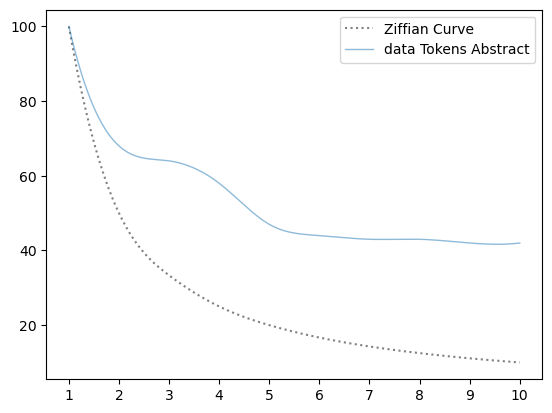

In [253]:
ziffianCurveValues = [100/i for i in range(1, depth+1)]
sorted_list =  list(sorted_dict.values())
x, y = smoothify(ziffianCurveValues)
plt.plot(x, y, label='Ziffian Curve', ls=':', color='grey')

maxValue = sorted_list[0]
yAxis = [percentify(value, maxValue) for value in sorted_list[:depth]]
x, y = smoothify(yAxis)
plt.plot(x, y, label=i+f' Tokens Abstract', lw=1, alpha=0.5)

plt.xticks(range(0, depth), xAxis)

plt.legend()
#plt.savefig('wordamounts.png', dpi=300)
plt.show()

In [ ]:
for i in textwordamounts:
    maxValue = list(textwordamounts[i].values())[0]
    yAxis = [percentify(value, maxValue) for value in list(textwordamounts[i].values())]
    x, y = smoothify(yAxis)
    plt.plot(x, y, label=i+f' [{textlengths[i]}]', lw=1, alpha=0.5)

plt.xticks(range(0, depth), xAxis)

plt.legend()
plt.savefig('wordamounts.png', dpi=300)
plt.show()